# MESH Streamflow File Preparation

In [ ]:
""" import os
import sys

# Define the folder path
folder_path = r'D:\2_CodeProjects\GitHub\Repos\MESH-Scripts-PyLib\src'

# Check if the folder is already in sys.path, if not, add it
if folder_path not in sys.path:
    sys.path.append(folder_path) """

In [1]:
#!pip uninstall MESH-Scripts-PyLib -y

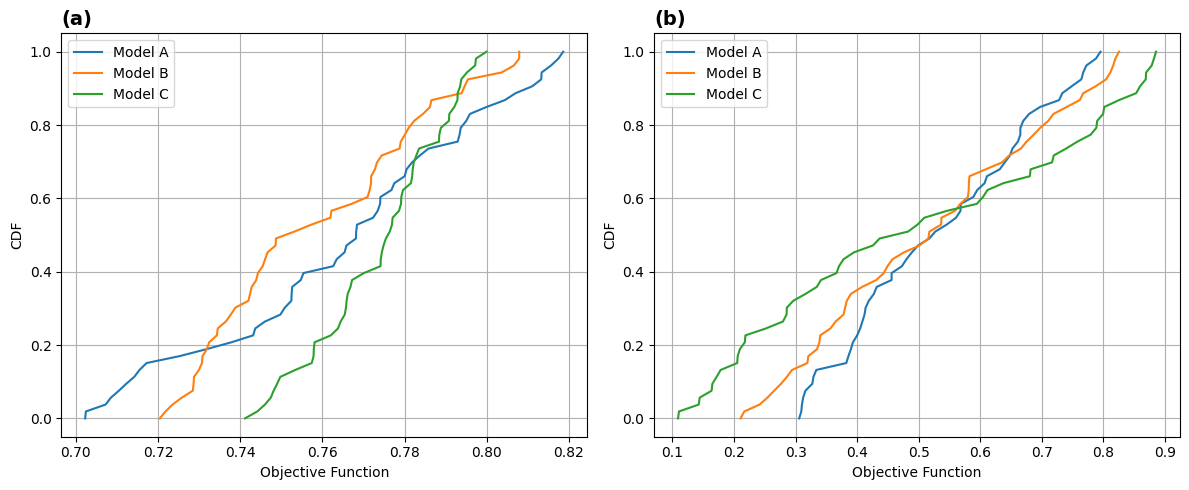

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sample setup (replace this with your actual data)
# For example purposes only
np.random.seed(0)
nse_data = {
    'Model A': np.random.uniform(0.7, 0.82, 54),
    'Model B': np.random.uniform(0.72, 0.81, 54),
    'Model C': np.random.uniform(0.74, 0.80, 54),
}

kge_data = {
    'Model A': np.random.uniform(0.3, 0.8, 54),
    'Model B': np.random.uniform(0.2, 0.85, 54),
    'Model C': np.random.uniform(0.1, 0.9, 54),
}

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# NSE Plot (Panel a)
for label, values in nse_data.items():
    sorted_vals = np.sort(values)
    cdf = np.linspace(0, 1, len(sorted_vals))
    axes[0].plot(sorted_vals, cdf, label=label)

axes[0].set_title("(a)", loc='left', fontsize=14, fontweight='bold')
axes[0].set_xlabel("Objective Function")
axes[0].set_ylabel("CDF")
axes[0].legend()
axes[0].grid(True)

# KGE Plot (Panel b)
for label, values in kge_data.items():
    sorted_vals = np.sort(values)
    cdf = np.linspace(0, 1, len(sorted_vals))
    axes[1].plot(sorted_vals, cdf, label=label)

axes[1].set_title("(b)", loc='left', fontsize=14, fontweight='bold')
axes[1].set_xlabel("Objective Function")
axes[1].set_ylabel("CDF")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#!pip install owslib

In [ ]:
#!pip install git+https://github.com/MESH-Model/MESH-Scripts-PyLib.git

In [ ]:
from MESHpyPreProcessing.gen_streamflow_file import GenStreamflowFile
gen_flow = GenStreamflowFile()
import pandas as pd
# Example usage of GenStreamflowFile to fetch and write streamflow data

# 1) Historical daily‐mean (1980–2018)
station_ca = ["05GG001", "05AC012"]
station_us = ["06132200", "05020500"]
start_date = "1980-03-01"
end_date   = "2018-01-10"
df_ca, meta_ca = gen_flow.fetch_hydrometric_data_ca(station_ca, start_date, end_date)
df_us, meta_us = gen_flow.extract_flow_data_us(station_us, start_date, end_date)
combined = pd.merge(df_ca, df_us, on="Date", how="outer")

# 2) Realtime provisional (last 1 month by 1-day windows)
from datetime import datetime, timezone
from dateutil.relativedelta import relativedelta
end_dt = datetime.now(timezone.utc).replace(microsecond=0)
start_dt = end_dt - relativedelta(months=1)
start = start_dt.strftime("%Y-%m-%dT%H:%M:%SZ")
end   = end_dt.strftime("%Y-%m-%dT%H:%M:%SZ")
df_rt, meta_rt = gen_flow.fetch_hydrometric_realtime_full_range(
    station_numbers=["05GG001","05AC012"],
    start=start, end=end,
    window_days=1, freq_hours=12
)

# 3) Write files
all_meta = meta_ca + meta_us + meta_rt
gen_flow.write_flow_data_to_file_obstxt("streamflow_obs.txt", combined, all_meta)
gen_flow.write_flow_data_to_file_ensim("streamflow.tb0", combined, all_meta)

Reltime data

In [3]:
# 2) Realtime provisional (last 1 month by 1-day windows)
from MESHpyPreProcessing.gen_streamflow_file import GenStreamflowFile
gen_flow = GenStreamflowFile()
from datetime import datetime, timezone
from dateutil.relativedelta import relativedelta
end_dt = datetime.now(timezone.utc).replace(microsecond=0)
start_dt = end_dt - relativedelta(months=1)
start = start_dt.strftime("%Y-%m-%dT%H:%M:%SZ")
end   = end_dt.strftime("%Y-%m-%dT%H:%M:%SZ")
df_rt, meta_rt = gen_flow.fetch_hydrometric_realtime_full_range(station_numbers=["05HG001","05AG006"],
                                                                start=start, end=end,
                                                                window_days=1, freq_hours=24
                                                                )

Window 2025-05-12–2025-05-13 in 0.3s
Window 2025-05-13–2025-05-14 in 0.3s
Window 2025-05-14–2025-05-15 in 0.3s
Window 2025-05-15–2025-05-16 in 0.4s
Window 2025-05-16–2025-05-17 in 0.4s
Window 2025-05-17–2025-05-18 in 0.3s
Window 2025-05-18–2025-05-19 in 0.4s
Window 2025-05-19–2025-05-20 in 0.3s
Window 2025-05-20–2025-05-21 in 0.3s
Window 2025-05-21–2025-05-22 in 0.4s
Window 2025-05-22–2025-05-23 in 0.3s
Window 2025-05-23–2025-05-24 in 0.3s
Window 2025-05-24–2025-05-25 in 0.3s
Window 2025-05-25–2025-05-26 in 0.3s
Window 2025-05-26–2025-05-27 in 0.3s
Window 2025-05-27–2025-05-28 in 0.4s
Window 2025-05-28–2025-05-29 in 0.4s
Window 2025-05-29–2025-05-30 in 0.3s
Window 2025-05-30–2025-05-31 in 0.4s
Window 2025-05-31–2025-06-01 in 0.3s
Window 2025-06-01–2025-06-02 in 0.3s
Window 2025-06-02–2025-06-03 in 0.4s
Window 2025-06-03–2025-06-04 in 0.4s
Window 2025-06-04–2025-06-05 in 0.3s
Window 2025-06-05–2025-06-06 in 0.3s
Window 2025-06-06–2025-06-07 in 0.3s
Window 2025-06-07–2025-06-08 in 0.4s
W

D:\2_CodeProjects\GitHub\Repos\MESH-Scripts-PyLib\src\MESHpyPreProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
D:\2_CodeProjects\GitHub\Repos\MESH-Scripts-PyLib\src\MESHpyPreProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")


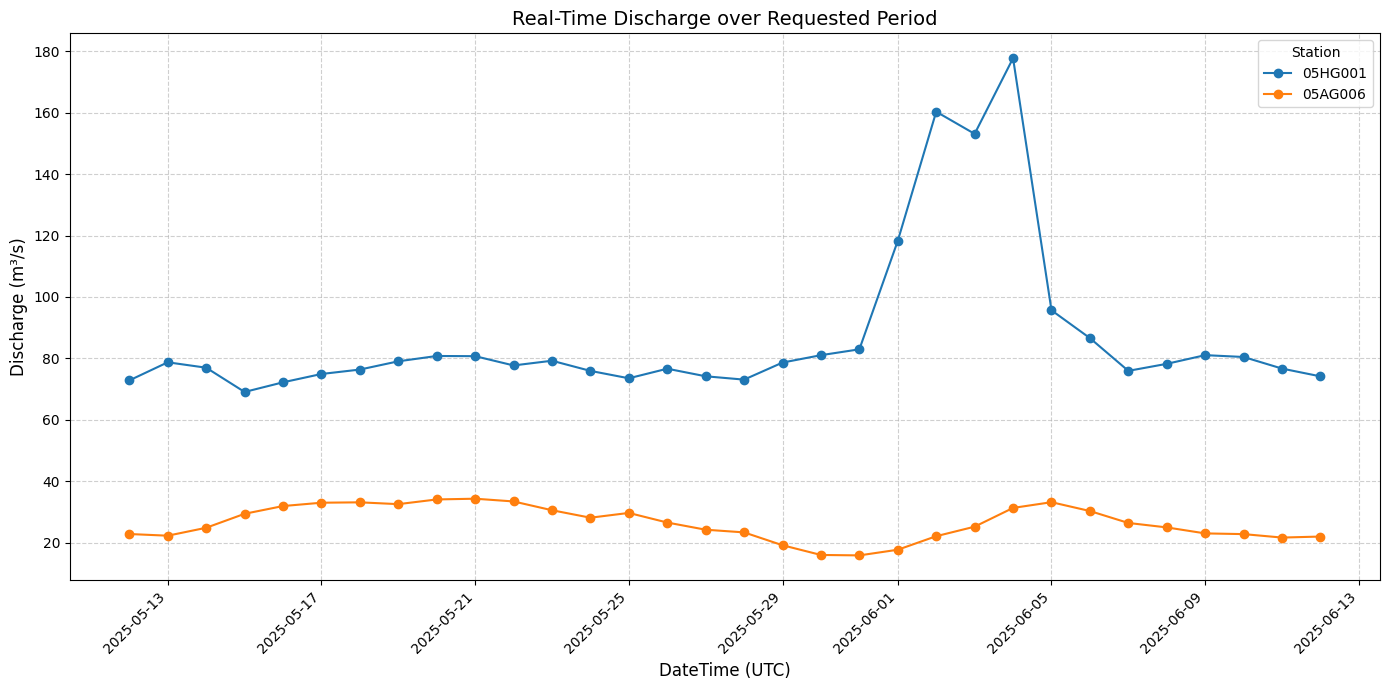

In [4]:
import matplotlib.pyplot as plt

if df_rt.empty:
    print("No data to plot.")
else:
    fig, ax = plt.subplots(figsize=(14, 7)) 
    for station in df_rt.columns:
        ax.plot(df_rt.index, df_rt[station], marker='o', linestyle='-', label=station)

    ax.set_xlabel("DateTime (UTC)", fontsize=12) 
    ax.set_ylabel("Discharge (m³/s)", fontsize=12) 
    ax.set_title("Real-Time Discharge over Requested Period", fontsize=14) 
    ax.legend(title="Station", loc='best') #

    plt.xticks(rotation=45, ha='right') 
    plt.grid(True, linestyle='--', alpha=0.6) 
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# — assume you’ve already done —
# df_full, meta_full = fetch_realtime_hydrometric_ca_full_range(...)

if df_rt.empty:
    print("No data to plot.")
else:
    fig, ax = plt.subplots(figsize=(14, 7)) # Increased figure size for better readability
    for station in df_rt.columns:
        ax.plot(df_rt.index, df_rt[station], marker='o', linestyle='-', label=station)

    ax.set_xlabel("DateTime (UTC)", fontsize=12) # Increased label font size
    ax.set_ylabel("Discharge (m³/s)", fontsize=12) # Increased label font size
    ax.set_title("Real-Time Discharge over Requested Period", fontsize=14) # Increased title font size
    ax.legend(title="Station", loc='best') # Improved legend placement

    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.grid(True, linestyle='--', alpha=0.6) # Add grid lines
    plt.tight_layout()
    plt.show()

In [ ]:
from MESHpyPreProcessing.gen_streamflow_file import GenStreamflowFile

gen_flow = GenStreamflowFile()

In [ ]:
station_ca = ["05MA012","05MA016","05JJ003","05MD010","05MD004","05MB003","05MB006","05MB001","05MC001","05JJ009","05MD007","05MA011","05JH005","05MB005","05MJ003","05MG001","05ME006","05JM001","05JM013","05JK008","05JK007","05JK002","05ME012","05ME001","05ME007","05JF001","05JF005","05JF006","05JF011","05JF012","05JE006","05JE001","05JE004","05JG004","05JK004","05JG013","05MD005","05NE003","05JH001","05JM015","05JL005","05JE005","05MF001","05JM010","05ME003","05MF024","05ME010","05MF008","05JG001","05MJ001","05MJ004","05MH006","05MH001","05MH013","05NG001","05NG007","05NG012","05NG021","05NF001","05NF008","05NF002","05NF012","05ND004","05ND013","05NB001","05NB036","05NG003","05NG024","05NB017","05NB040","05NB011","05NB031","05NB027","05NF007","05ND010","05NC001","05MF018","05NB021","05MG004","05NF006","05NA004","05NG020","05NG019","05NG010","05NA005","05ND007","05NA003"]
station_us = ["05112000","05113600","05114000","05116000","05116500"]
start_date = "1980-01-01"
end_date = "2018-01-10"
combined_data_ca, station_info_ca = gen_flow.fetch_hydrometric_data_ca(station_ca, start_date, end_date)
combined_data_us, station_info_us = gen_flow.extract_flow_data_us(station_us, start_date, end_date)

In [ ]:
import pandas as pd
combined_data = pd.merge(combined_data_ca, combined_data_us, on='Date', how='outer')
combined_station_info = station_info_ca + station_info_us
#combined_data = combined_data_ca
#combined_station_info = station_info_ca

In [ ]:
print(station_info_ca)

In [ ]:
gen_flow.write_flow_data_to_file_obstxt('MESH_input_streamflow.txt', combined_data, combined_station_info)

gen_flow.write_flow_data_to_file_ensim('MESH_input_streamflow.tb0', combined_data, combined_station_info)